# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [71]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [72]:
# let colab access my google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [73]:
# Now we can import the data
data = pd.read_csv('/gdrive/MyDrive/MGL/T&A/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [74]:
# Let's first create a copy of the dataset to prevent unwanted changes
df = data.copy()

In [75]:
# Let's first check the shape of our data
df.shape

(340, 15)

In [76]:
# Now let's take a closer look at the first few rows of data
df.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


In [77]:
# And now for a more detailed overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [78]:
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [79]:
# Let's create a function to return the sum of unique values for each column in our data set
def count_unique_values(dataset):
    unique_counts = {}
    for column in dataset.columns:
        unique_counts[column] = len(dataset[column].unique())
    return unique_counts

In [80]:
# Now we can call our new function to print a list of the sum of unique values for each column
unique_values = count_unique_values(df)
unique_values

{'Ticker Symbol': 340,
 'Security': 340,
 'GICS Sector': 11,
 'GICS Sub Industry': 104,
 'Current Price': 336,
 'Price Change': 340,
 'Volatility': 340,
 'ROE': 82,
 'Cash Ratio': 124,
 'Net Cash Flow': 332,
 'Net Income': 335,
 'Earnings Per Share': 268,
 'Estimated Shares Outstanding': 323,
 'P/E Ratio': 295,
 'P/B Ratio': 299}

In [81]:
# Find duplicate values in specific columns
df.value_counts('GICS Sector')

GICS Sector
Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
dtype: int64

### **Insights**#
* To start, we appear to have all values of our data present.
* We have 4 object columns and 11 numerical columns.
* We have a total of 11 sectors represented and 104 sub industries represented.
* They Industrials sector is our most represented while Telecommunications is the least represented.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Function creation

In [82]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [83]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Prices and Volatility

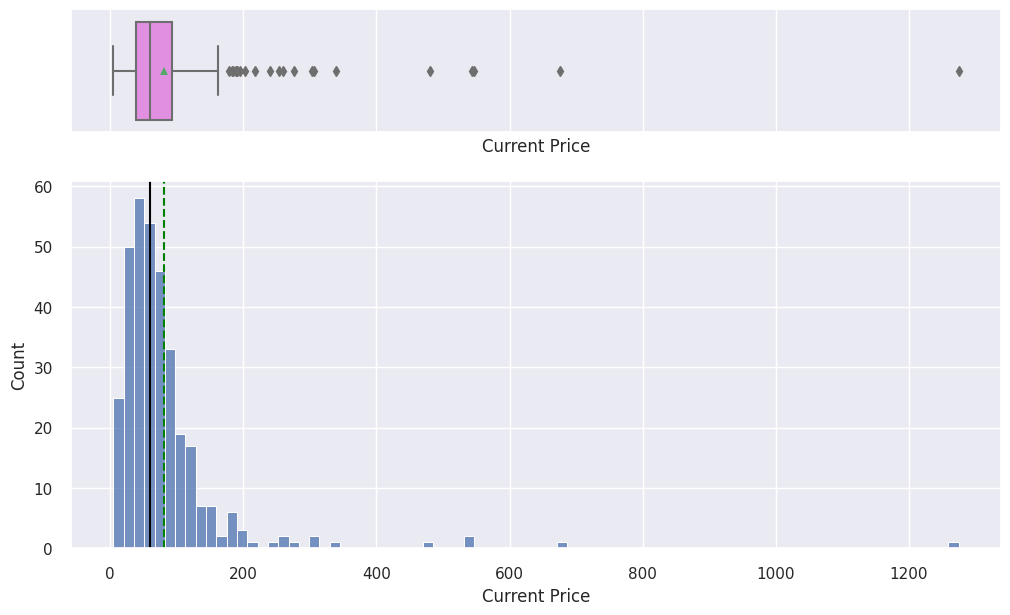

In [84]:
# Let's look at the current valuations
histogram_boxplot(df, 'Current Price')

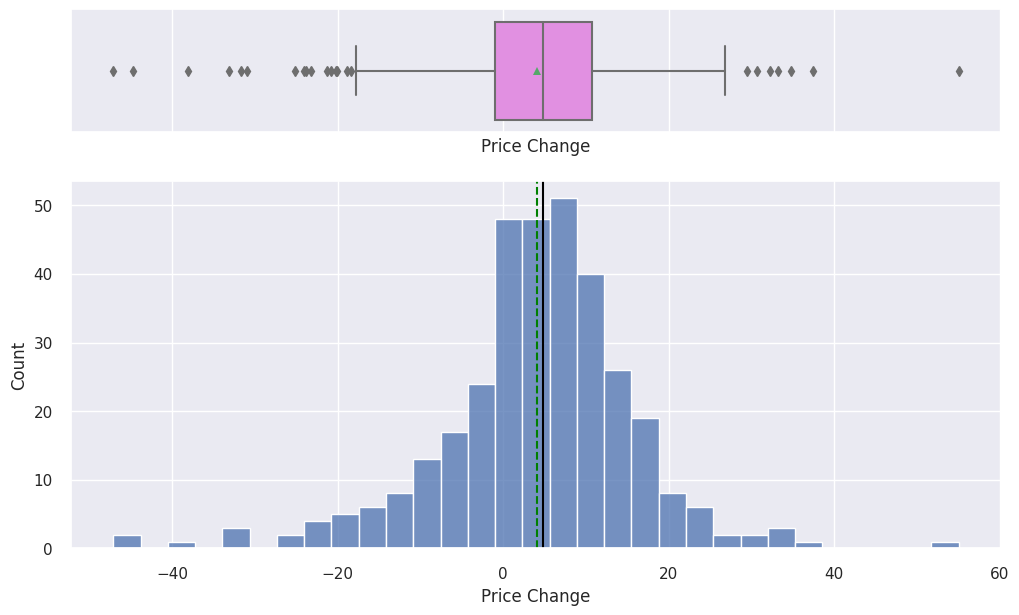

In [85]:
histogram_boxplot(df, 'Price Change')

* Most of our ticker valuations are under 200$, with some outliers almost 6 times as much as the rest.
* We seem to have a roughly normal distribution of price changes in the last 13 weeks.
* Prices ranged anywhere between losing 20% to gaining 30% in value.
* Some outliers lost as much our gained as much as 50% in value.

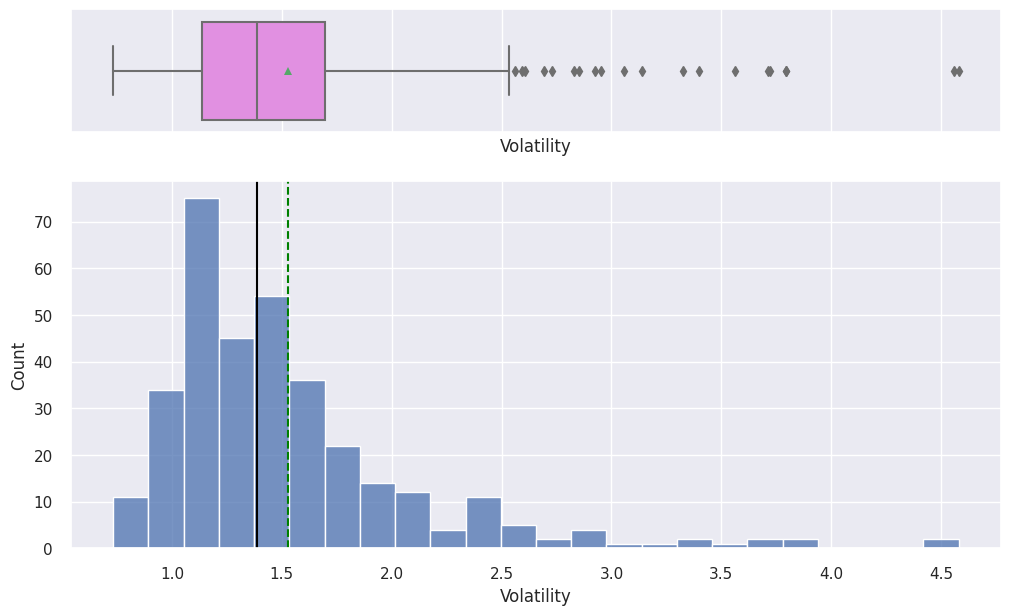

In [86]:
histogram_boxplot(df, 'Volatility')

* Our data here is left skewed, showing that most of our tickers have relatively low volatility.
* The mean is higher than the median, suggesting the outliers are effecting the data here.

#### ROE

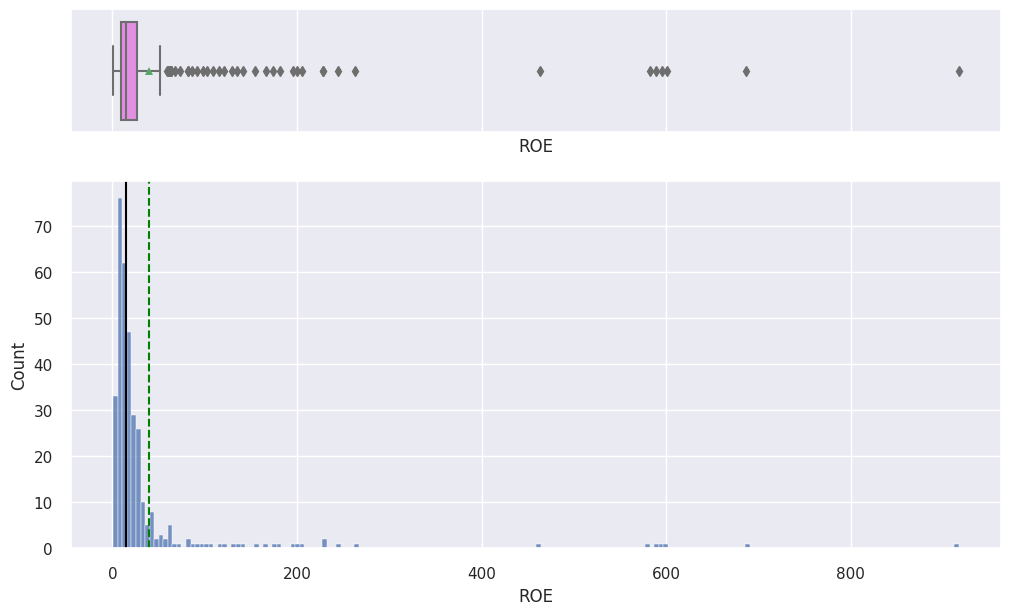

In [87]:
histogram_boxplot(df, 'ROE')

In [88]:
# Filter values in 'ROE' column greater than 600
filtered_df = df[df['ROE'] > 600]

# Display filtered DataFrame
print(filtered_df)

   Ticker Symbol            Security  GICS Sector  \
18          ALLE            Allegion  Industrials   
30           APA  Apache Corporation       Energy   
62           CHK   Chesapeake Energy       Energy   

                     GICS Sub Industry  Current Price  Price Change  \
18                   Building Products      65.919998     13.753230   
30  Oil & Gas Exploration & Production      44.470001     11.397804   
62                Integrated Oil & Gas       4.500000    -38.101788   

    Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
18    1.283795  601          45      -90800000    153900000   
30    2.405408  917          80      698000000 -23528000000   
62    4.559815  687          22    -3283000000 -14685000000   

    Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
18                1.60                    96187500.0  41.199999  -0.877453  
30              -61.20                   384444444.4  93.089287   4.970809  
62              -2

* Similar to our volatility chart, the Return on Equity chart is highly skewed to the left.
* Most of the tickers offered a small return, but some outliers offered a major ROE.
* Three tickers offered an ROE greater than 600: ALLE, APA, and CHK.

#### Cash Ratio

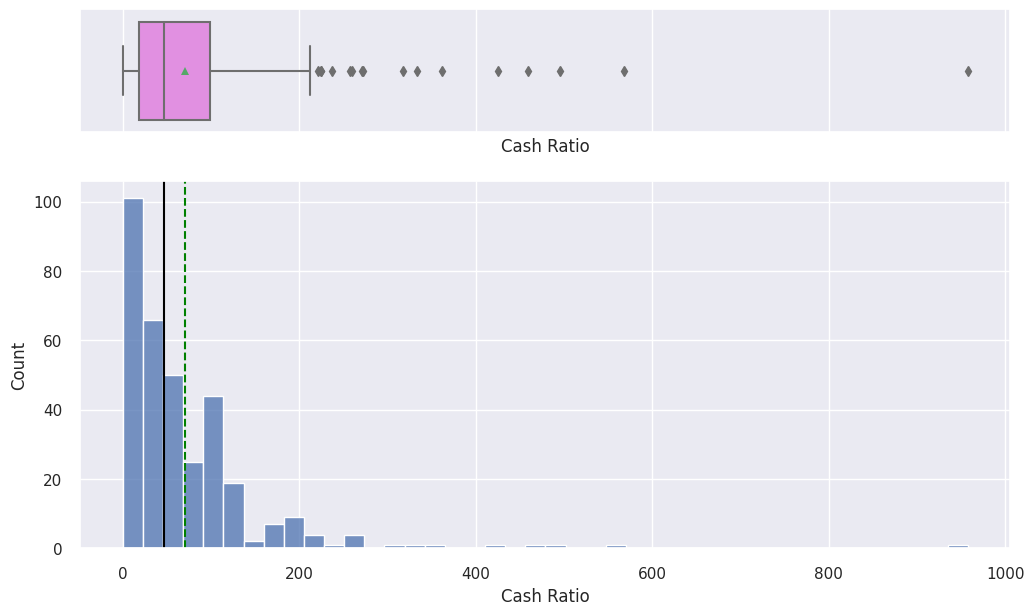

In [89]:
histogram_boxplot(df, 'Cash Ratio')

#### Net Cash Flow

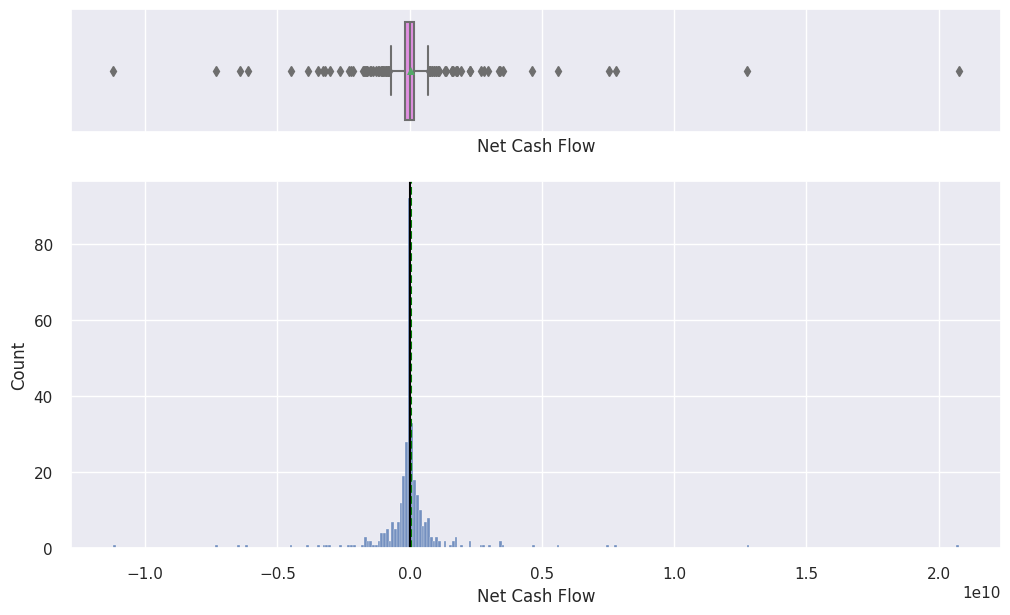

In [90]:
histogram_boxplot(df, 'Net Cash Flow')

#### Net Income

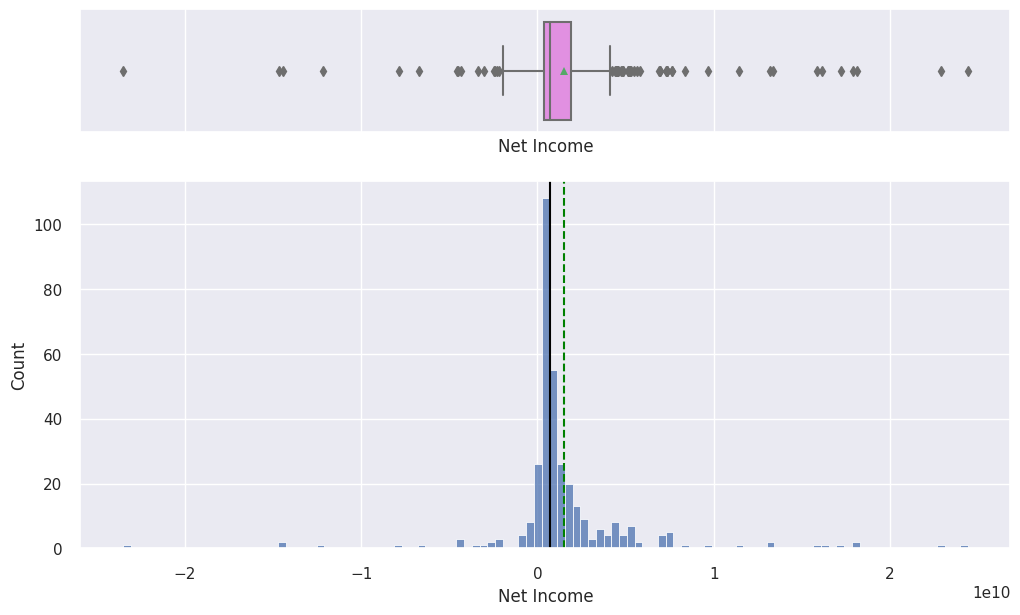

In [91]:
histogram_boxplot(df, 'Net Income')

#### Earnings Per Share

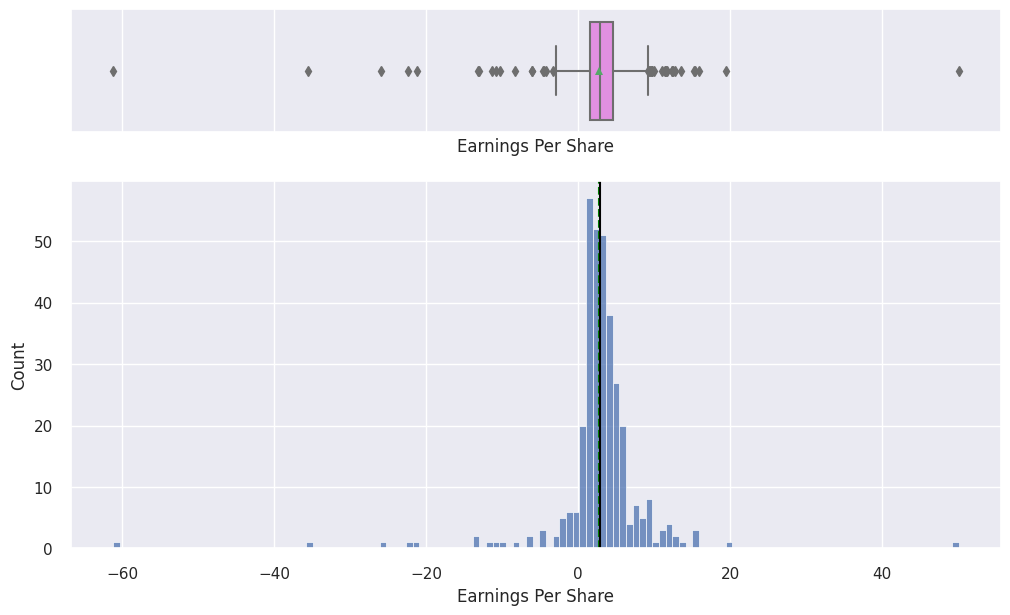

In [92]:
histogram_boxplot(df, 'Earnings Per Share')

#### Estimated Shares Outstanding

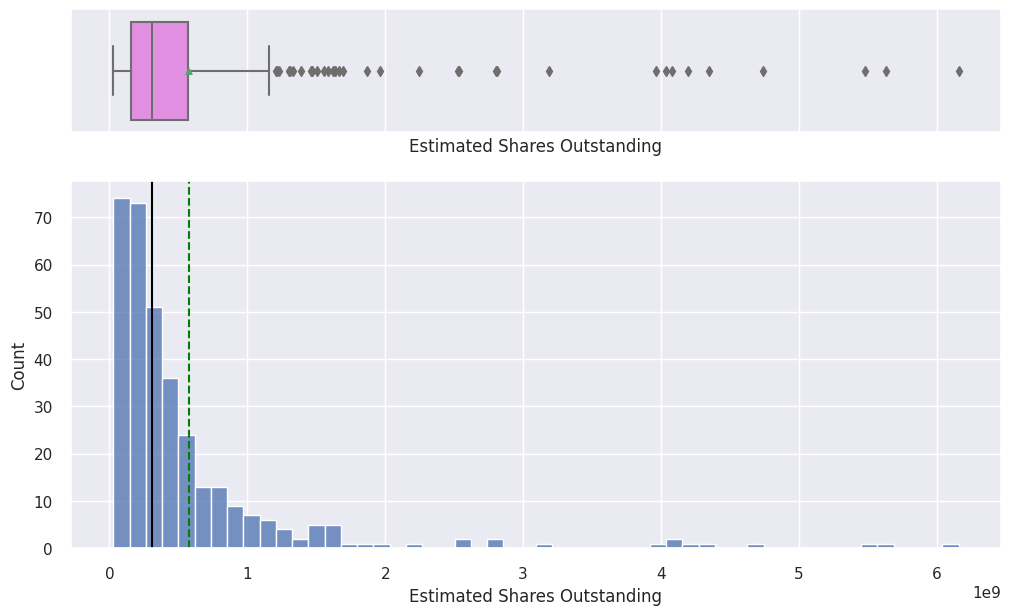

In [93]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

####  P/E and P/B Ratios

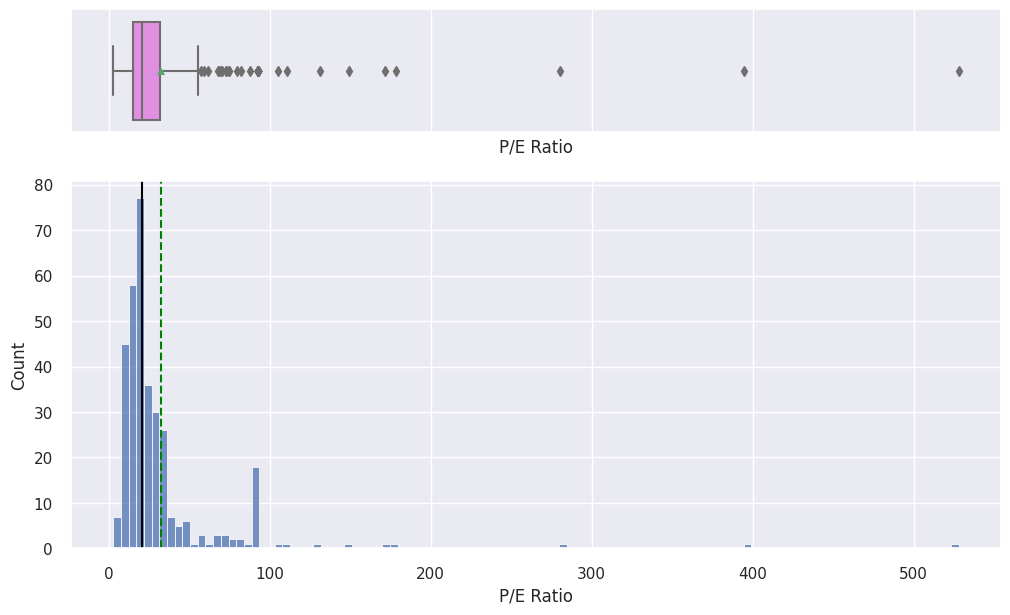

In [94]:
histogram_boxplot(df, 'P/E Ratio')

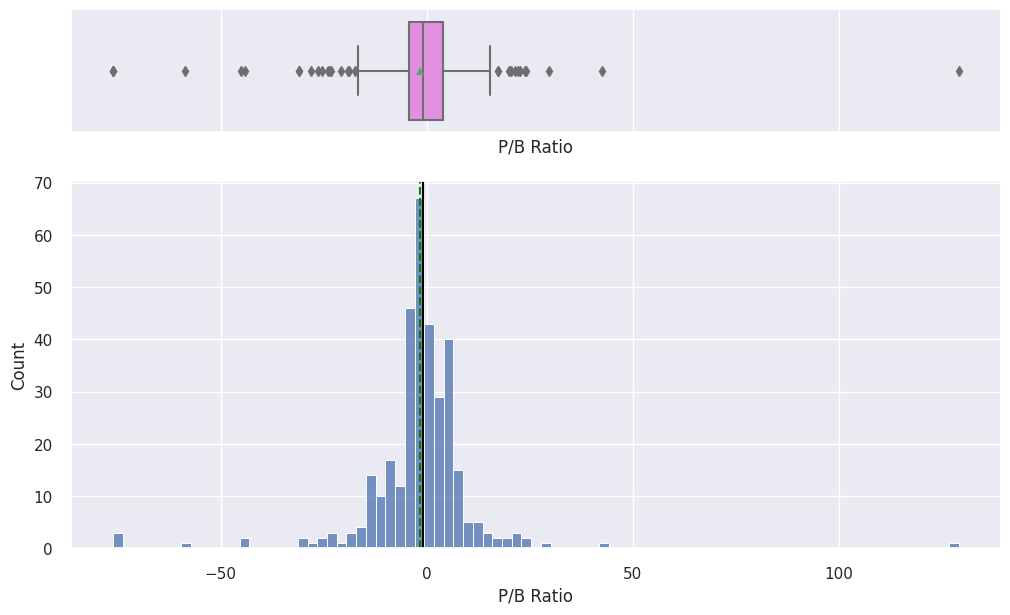

In [95]:
histogram_boxplot(df, 'P/B Ratio')

#### GICS Sector

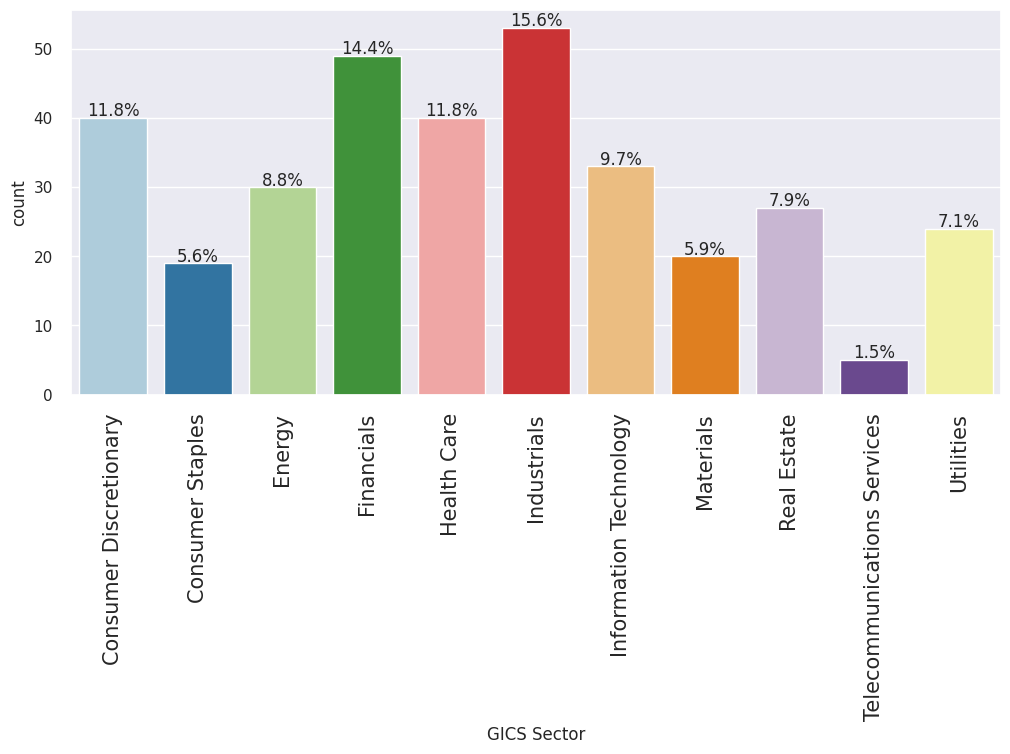

In [96]:
labeled_barplot(df, 'GICS Sector', perc=True)

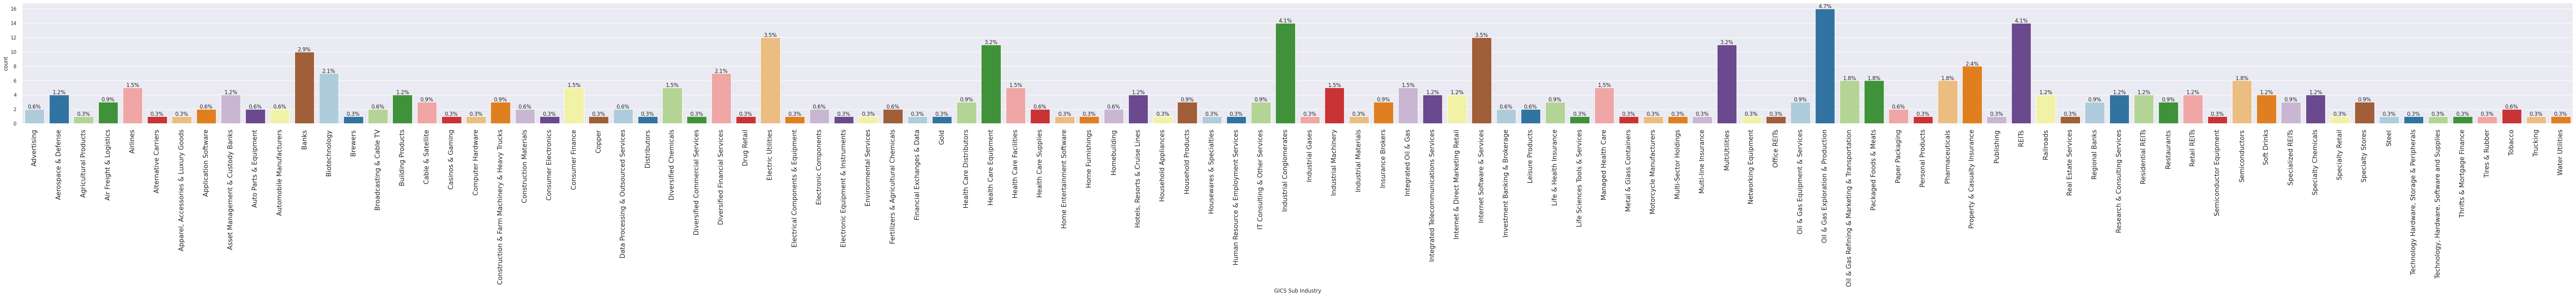

In [97]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

* Industrials represent the highest represtented sector, with Oil & Gas exploration as the highest represented sub sector.

### Bivariate Analysis

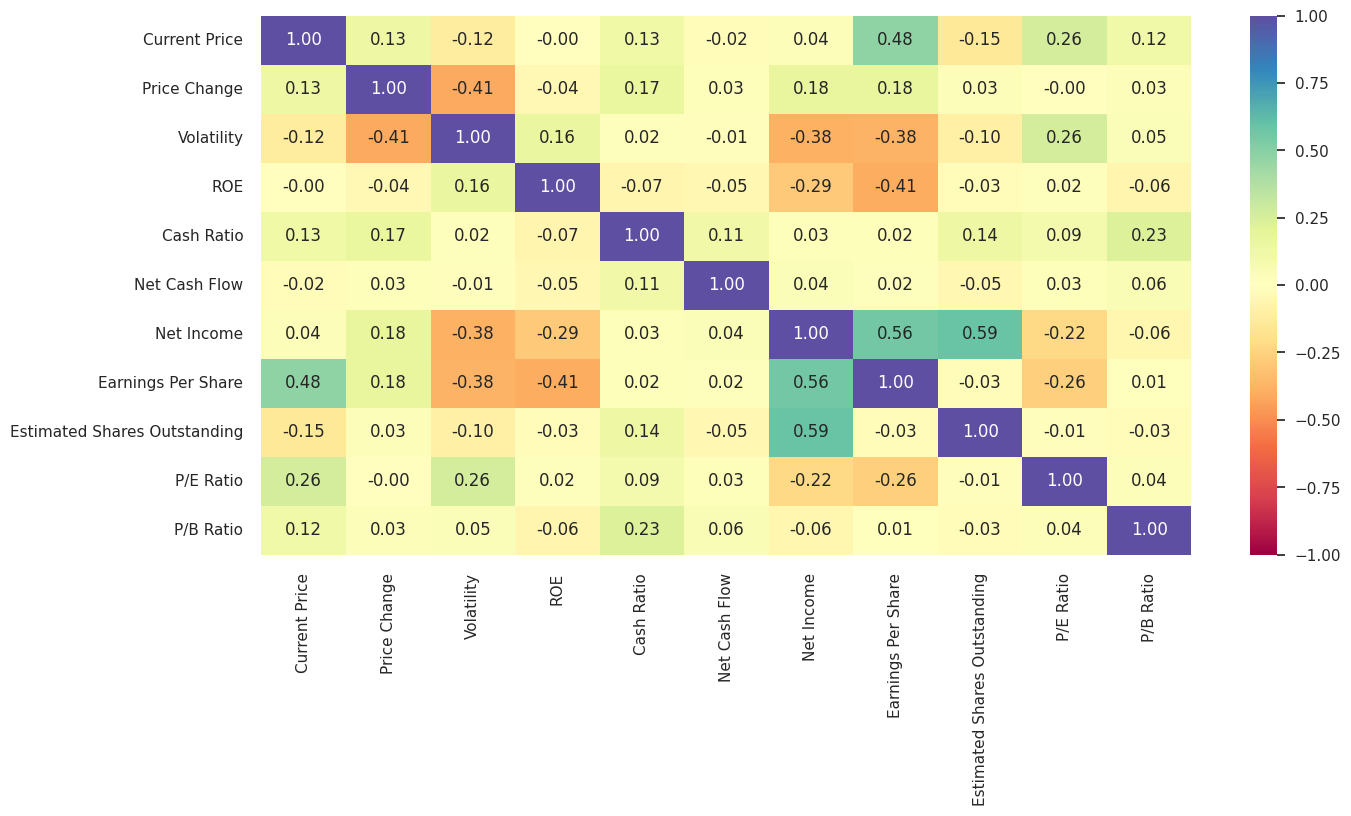

In [98]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* We have some weak postive correlations between Current price and earnings per share, Net Income and earnings per share, as well as net income and estimated shares outstanding.
We also have some weak negative correlation with volatility and net income, price change, and earnings per share. Roe and earnings per share has a negative correlation as well.

#### Price change analysis

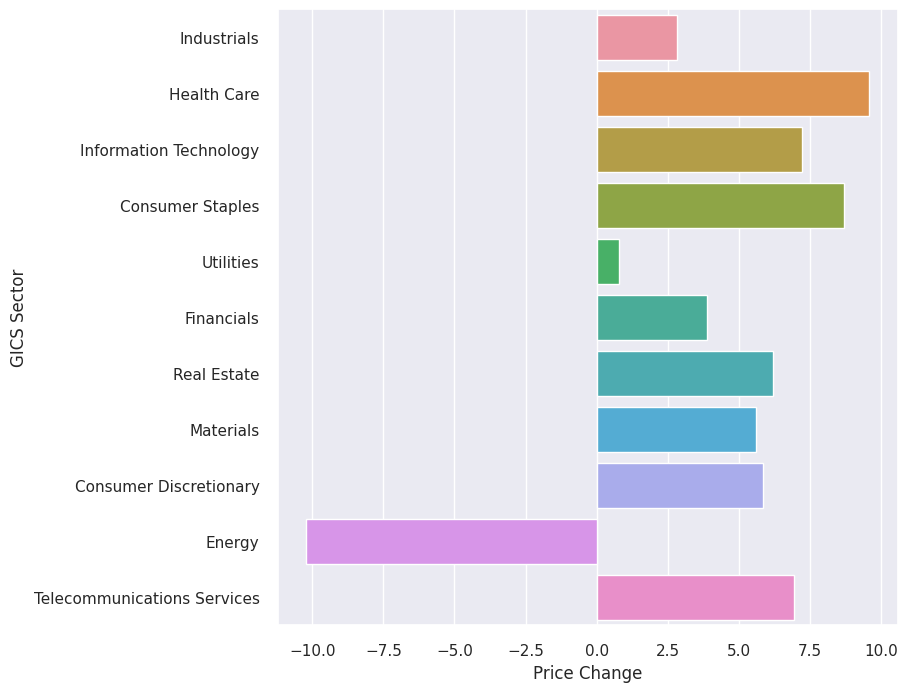

In [99]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, y='GICS Sector', x='Price Change', ci=False)
plt.show()

* Looking at price changes per sector, it's obvious Energy is the worst performing of the group.
* All other sectors rose in price, while Energy dropped considerably and lost value.

#### Further Sector Analysis

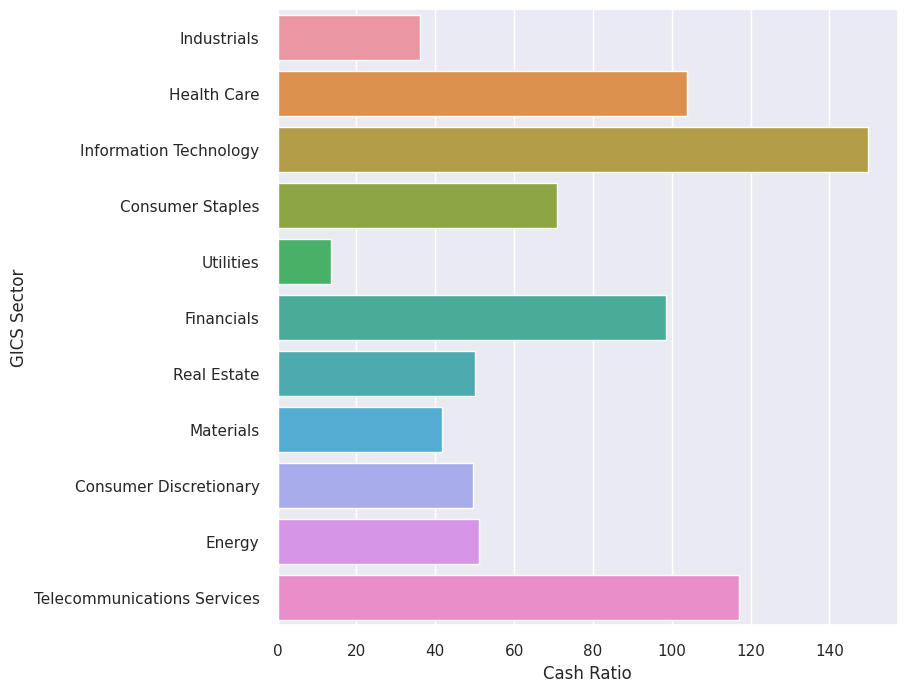

In [100]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, y='GICS Sector', x='Cash Ratio', ci=False)
plt.show()

* All of our sectors show a postive cash ratio.
* Nothing stands out with the Energy sector here compared to the group.
* Telecommunication and Information Technology have the highest amount of Equity against liabilities.

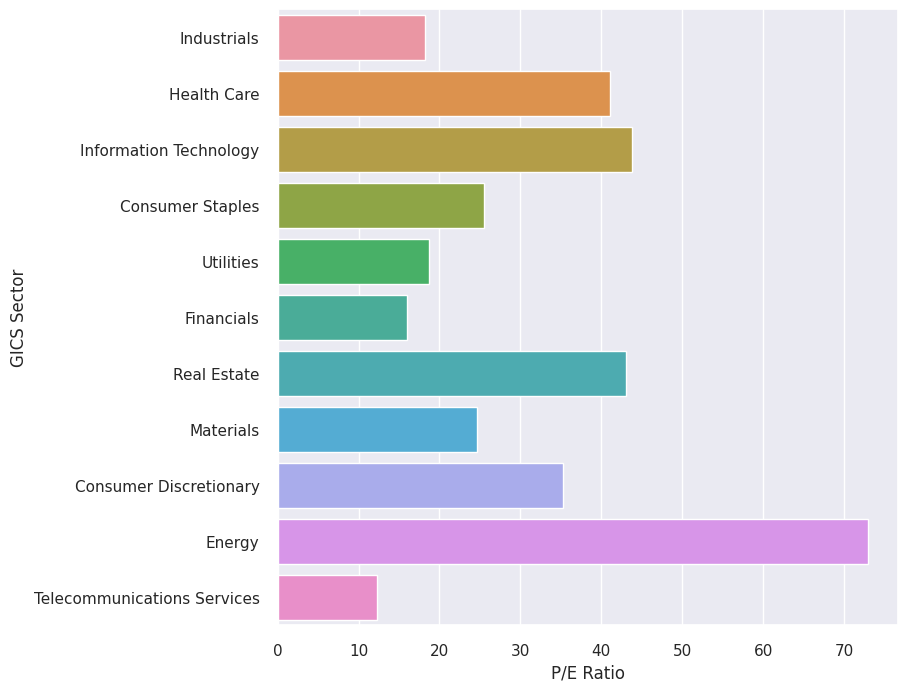

In [101]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, y='GICS Sector', x='P/E Ratio', ci=False)
plt.show()

* Energy hasd by far the highsest P/E Ratio compared to the rest of the group.
* Usually a high P/E ratio means the sector is expected to have a high amount of growth.
* This could be attributed to the recent valuation drop, and could see growth in the future.

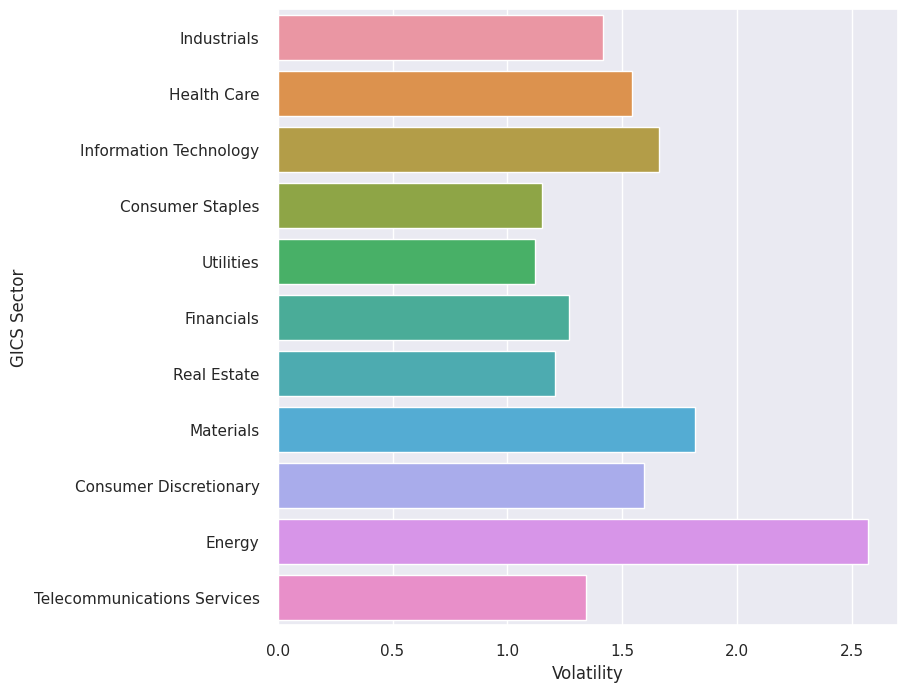

In [102]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, y='GICS Sector', x='Volatility', ci=False)
plt.show()

* As suspected, the Volatility in the Energy sector is the highest, where the rest of the group is roughly around the same metric.
* Because of the recent price drop, valuations can jump around quite a bit more than normal for the Energy sector.
* This means investment into this sector can have great returns, but the risk for great losses is equally as high.

In [103]:
sorted_df = df.sort_values(by='Current Price', ascending=False)

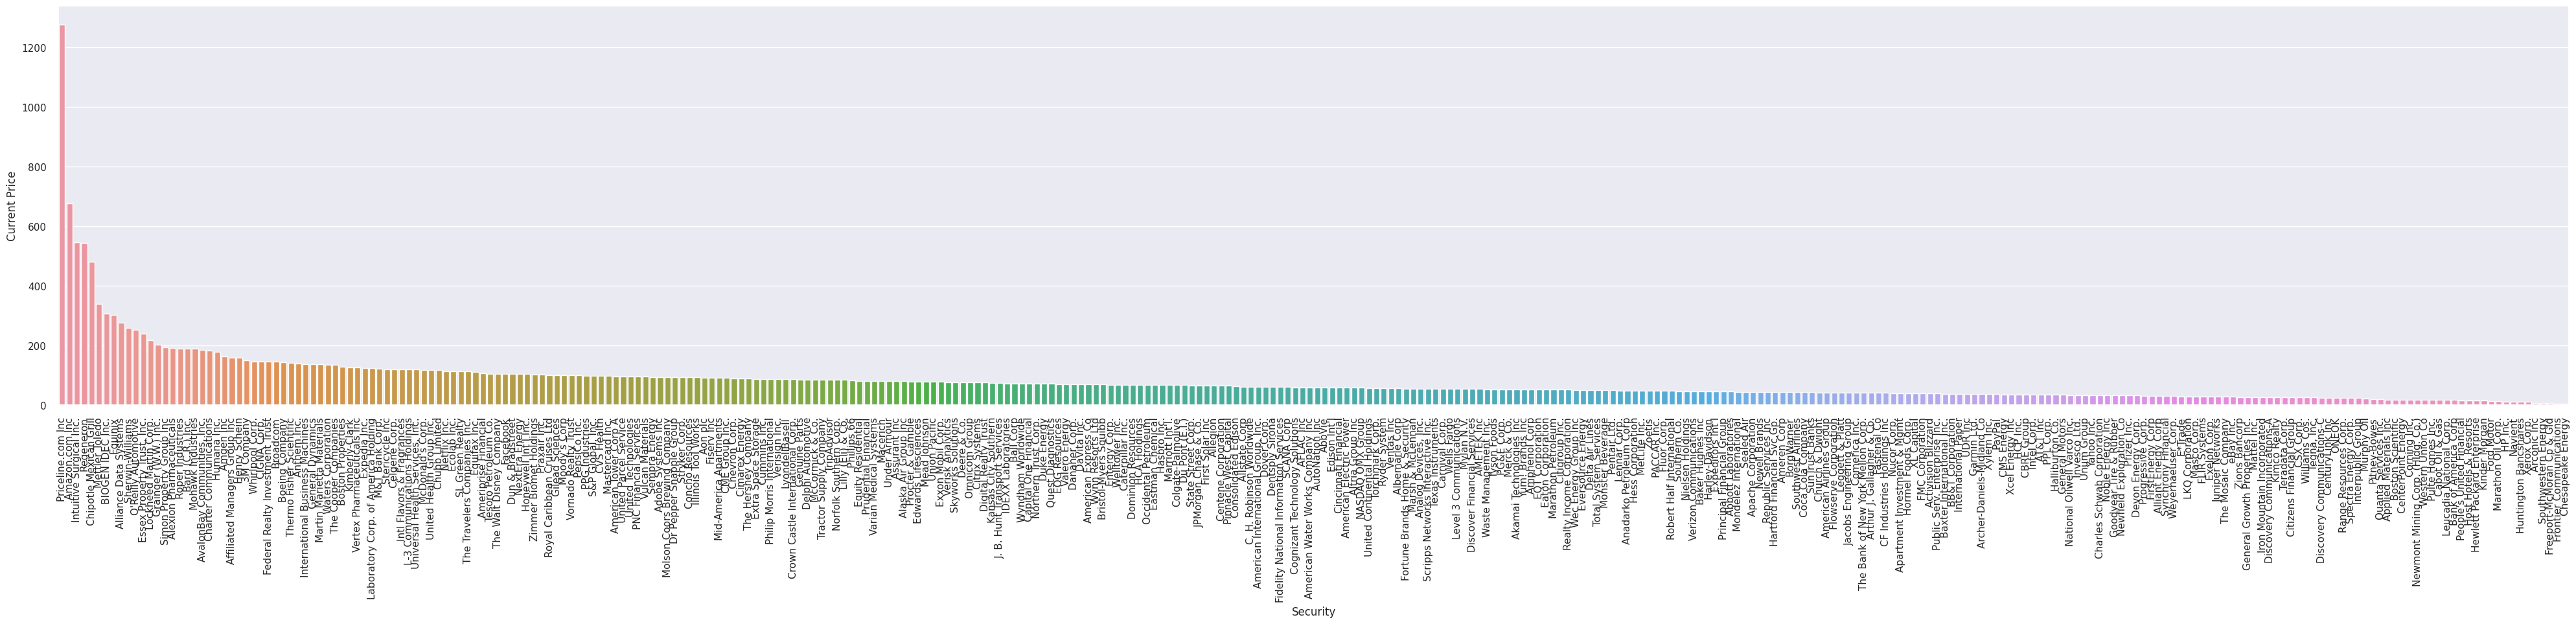

In [104]:
plt.figure(figsize=(50,8))
sns.barplot(data=sorted_df, x='Security', y='Current Price', ci=False)
plt.xticks(rotation=90)
plt.show()

* Of all securities listed in our dataset, Priceline.com has the highest valuation in terms of stock price.
* Chesapeake Energy rounds out the bottom as our lowest priced security.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

#### Outlier Analysis

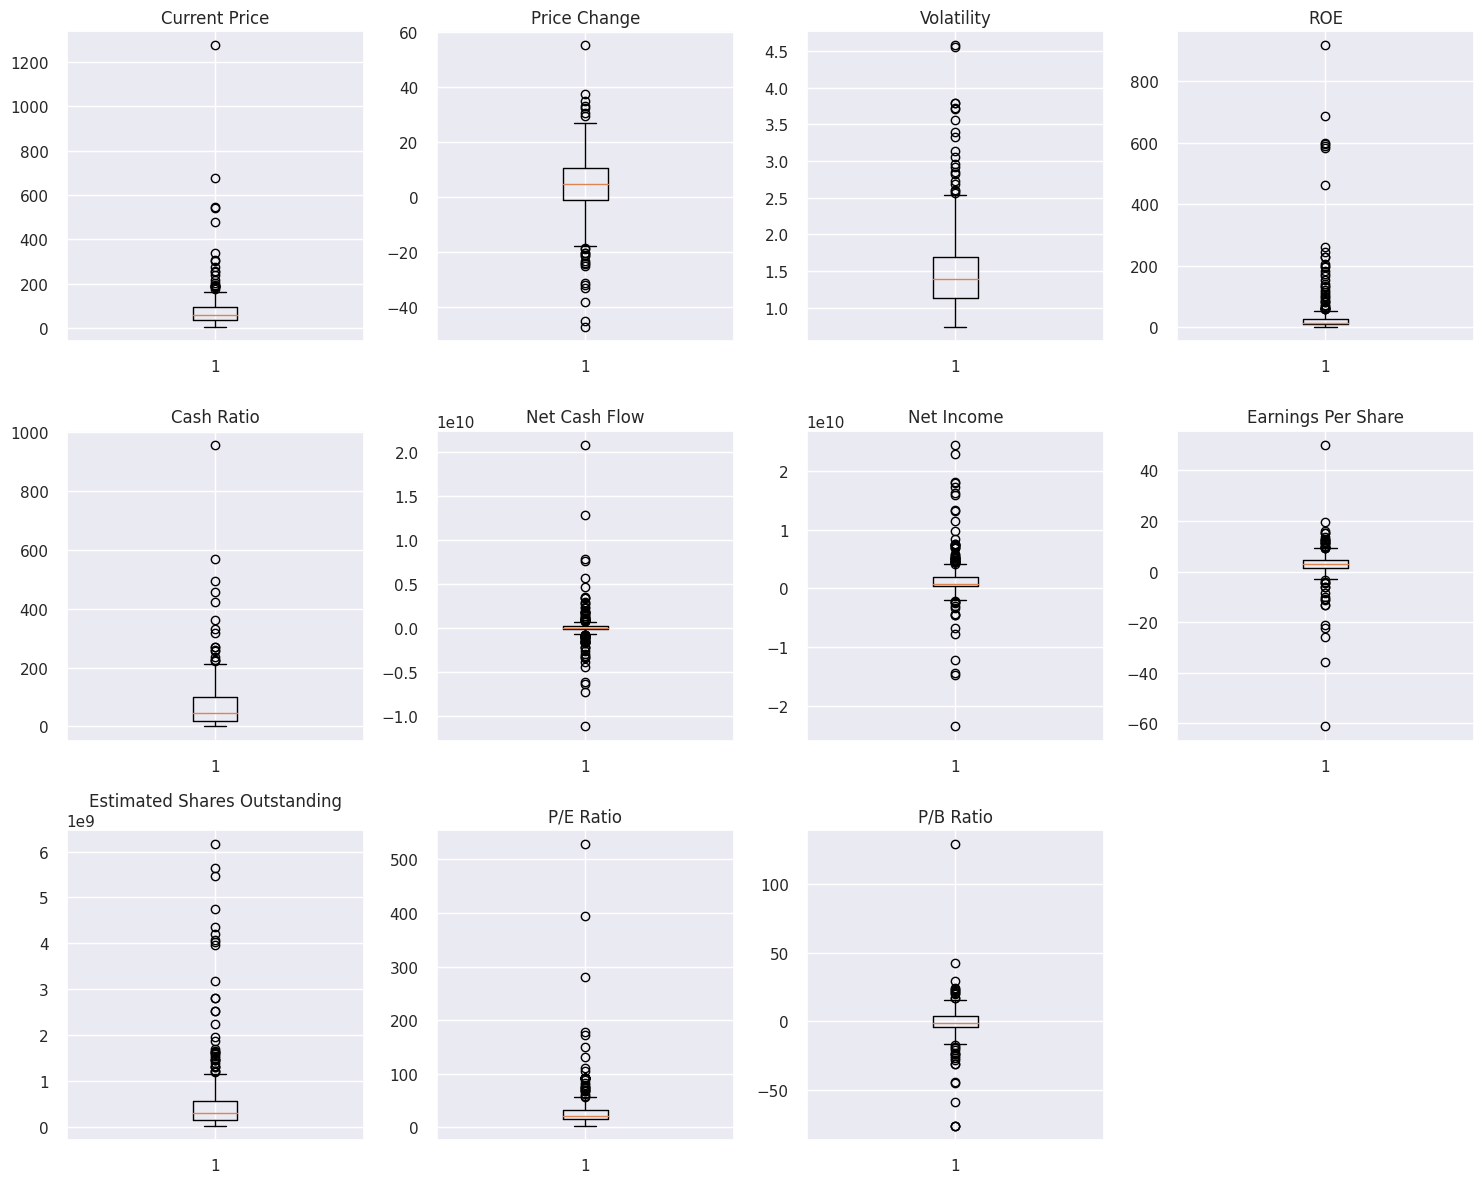

In [105]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Scaling

In [106]:
# Let's check our numeric columns we will scale and use for clustering
numeric_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [107]:
# Now we can scale our data
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [108]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [109]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

#### Elbow Plot Analysis

In [110]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 5.887920700424354
Number of Clusters: 2 	Average Distortion: 5.526545209467102
Number of Clusters: 3 	Average Distortion: 5.2268231521995085
Number of Clusters: 4 	Average Distortion: 5.0429006939190355
Number of Clusters: 5 	Average Distortion: 4.957248320844979
Number of Clusters: 6 	Average Distortion: 4.834180251981078
Number of Clusters: 7 	Average Distortion: 4.717377684716567
Number of Clusters: 8 	Average Distortion: 4.58568591626934
Number of Clusters: 9 	Average Distortion: 4.5221818263791596
Number of Clusters: 10 	Average Distortion: 4.391510667995212
Number of Clusters: 11 	Average Distortion: 4.229491145217527
Number of Clusters: 12 	Average Distortion: 4.211718976799932
Number of Clusters: 13 	Average Distortion: 4.1058985919813775
Number of Clusters: 14 	Average Distortion: 3.993508912391085


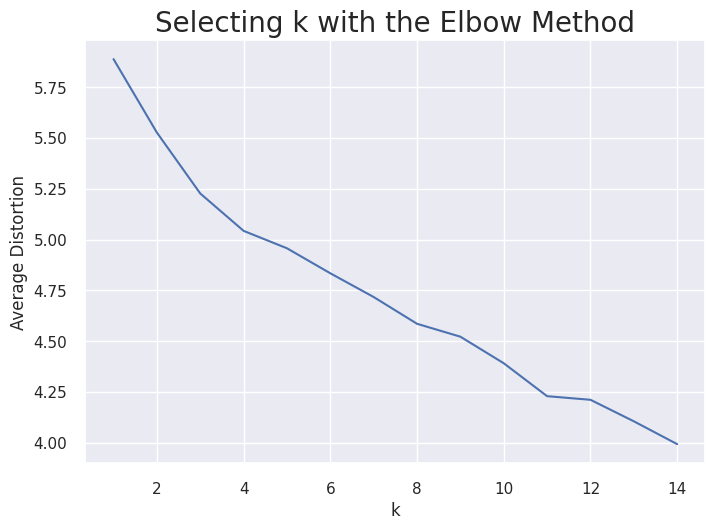

In [111]:
# Now we can begin fitting our data and visualize clustering via the elbow plot
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "cityblock"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

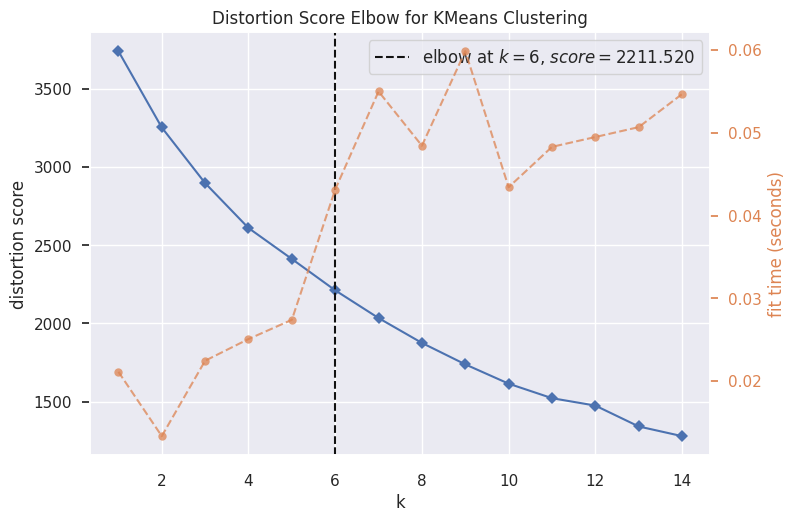

In [112]:
# Let's add a bit more structure to our elbow plot
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)
visualizer.show();

* 6 clusters seems to be a good stopping point, although you could argue 7 would work as well. For our purposes we will use 6 clusters.

#### Silhouette Scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


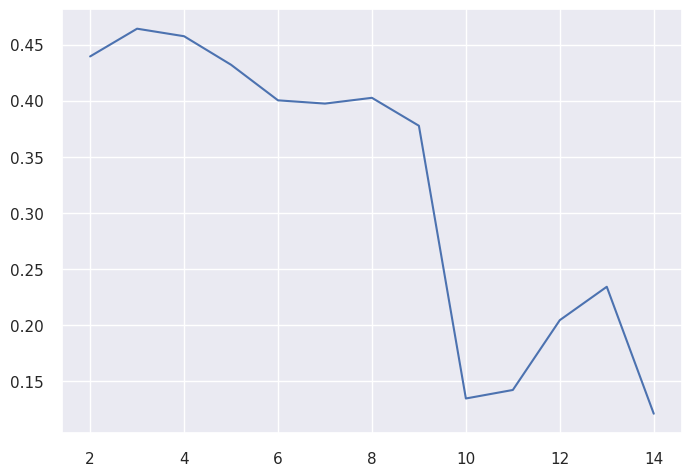

In [113]:
# Now that we have visualized our elbow plot,  we can compare those results with their silhouette scores
# Let's build an empty data frame for the scores and fill it with results after fitting the models
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show();

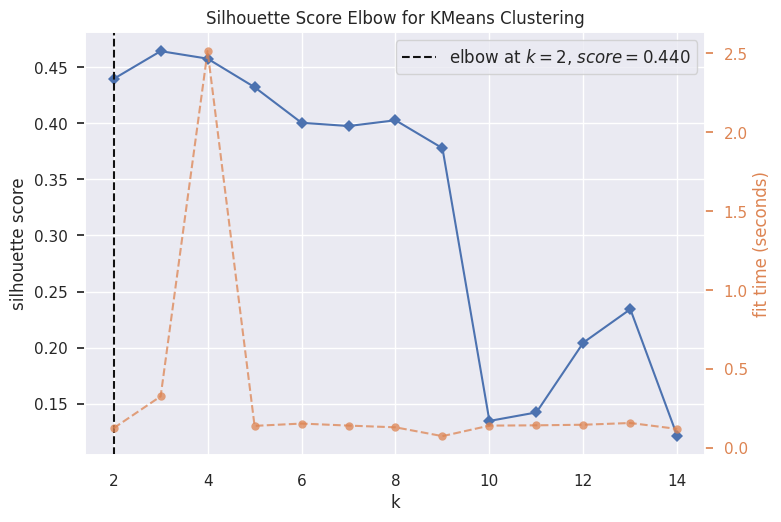

In [114]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show();

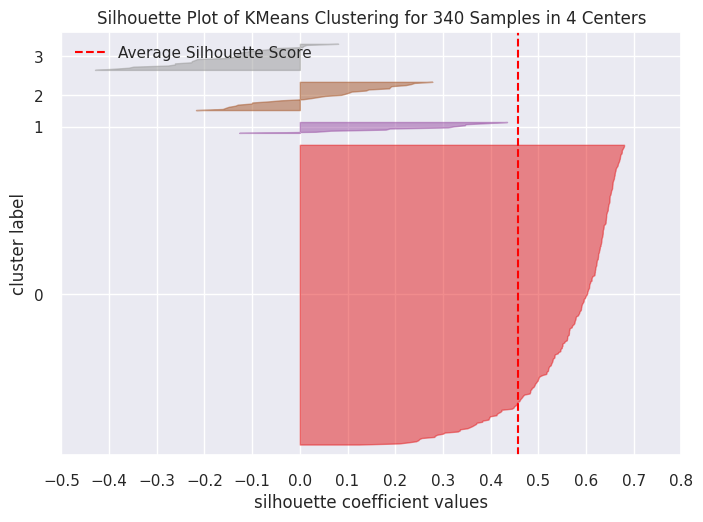

In [115]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show();

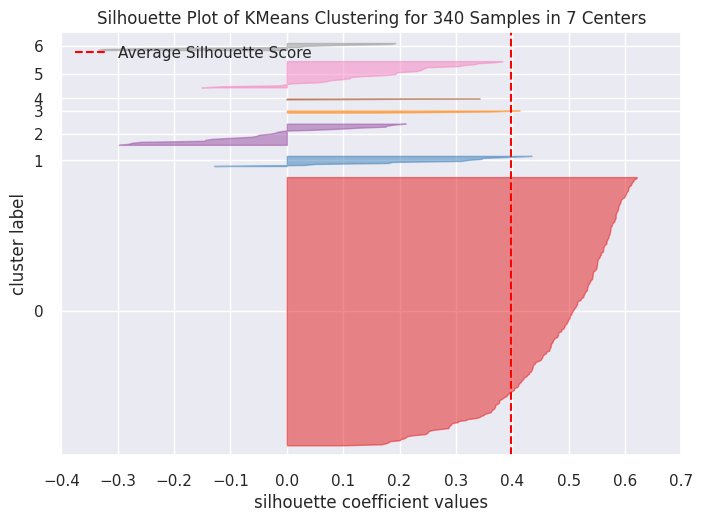

In [116]:
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show();

In [117]:
# let's take 7 as number of clusters
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=7, random_state=0)

In [118]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [119]:
df1.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,1
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,1
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,1
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,5
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,5


### Cluster Profiling

In [120]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [121]:
km_cluster_profile["count_in_each_segments"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [122]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
KM_segments,,,,,,,,,,,,
0,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
1,73.281231,5.002456,1.373721,25.303030,51.018939,5792560.606061,1517540458.333333,3.773201,422805643.026553,23.232765,-3.313539,264
2,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
3,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
4,632.714991,7.374164,1.541343,19.333333,158.333333,-24046333.333333,907393166.666667,16.270000,125797901.323333,123.049240,35.355736,6
5,95.281515,14.717580,1.814754,25.954545,308.909091,645568272.727273,871490181.818182,2.006364,730848546.662727,57.950455,7.992920,22
6,37.282919,-14.529500,2.820301,40.666667,47.555556,-133624777.777778,-1904442925.925926,-4.957037,503635899.112593,86.787432,1.378738,27


In [123]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1 [df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp

In [124]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary         32
             Consumer Staples               15
             Energy                          5
             Financials                     44
             Health Care                    29
             Industrials                    50
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Energy                          3
3            Consumer Discretionary          1
             Consum

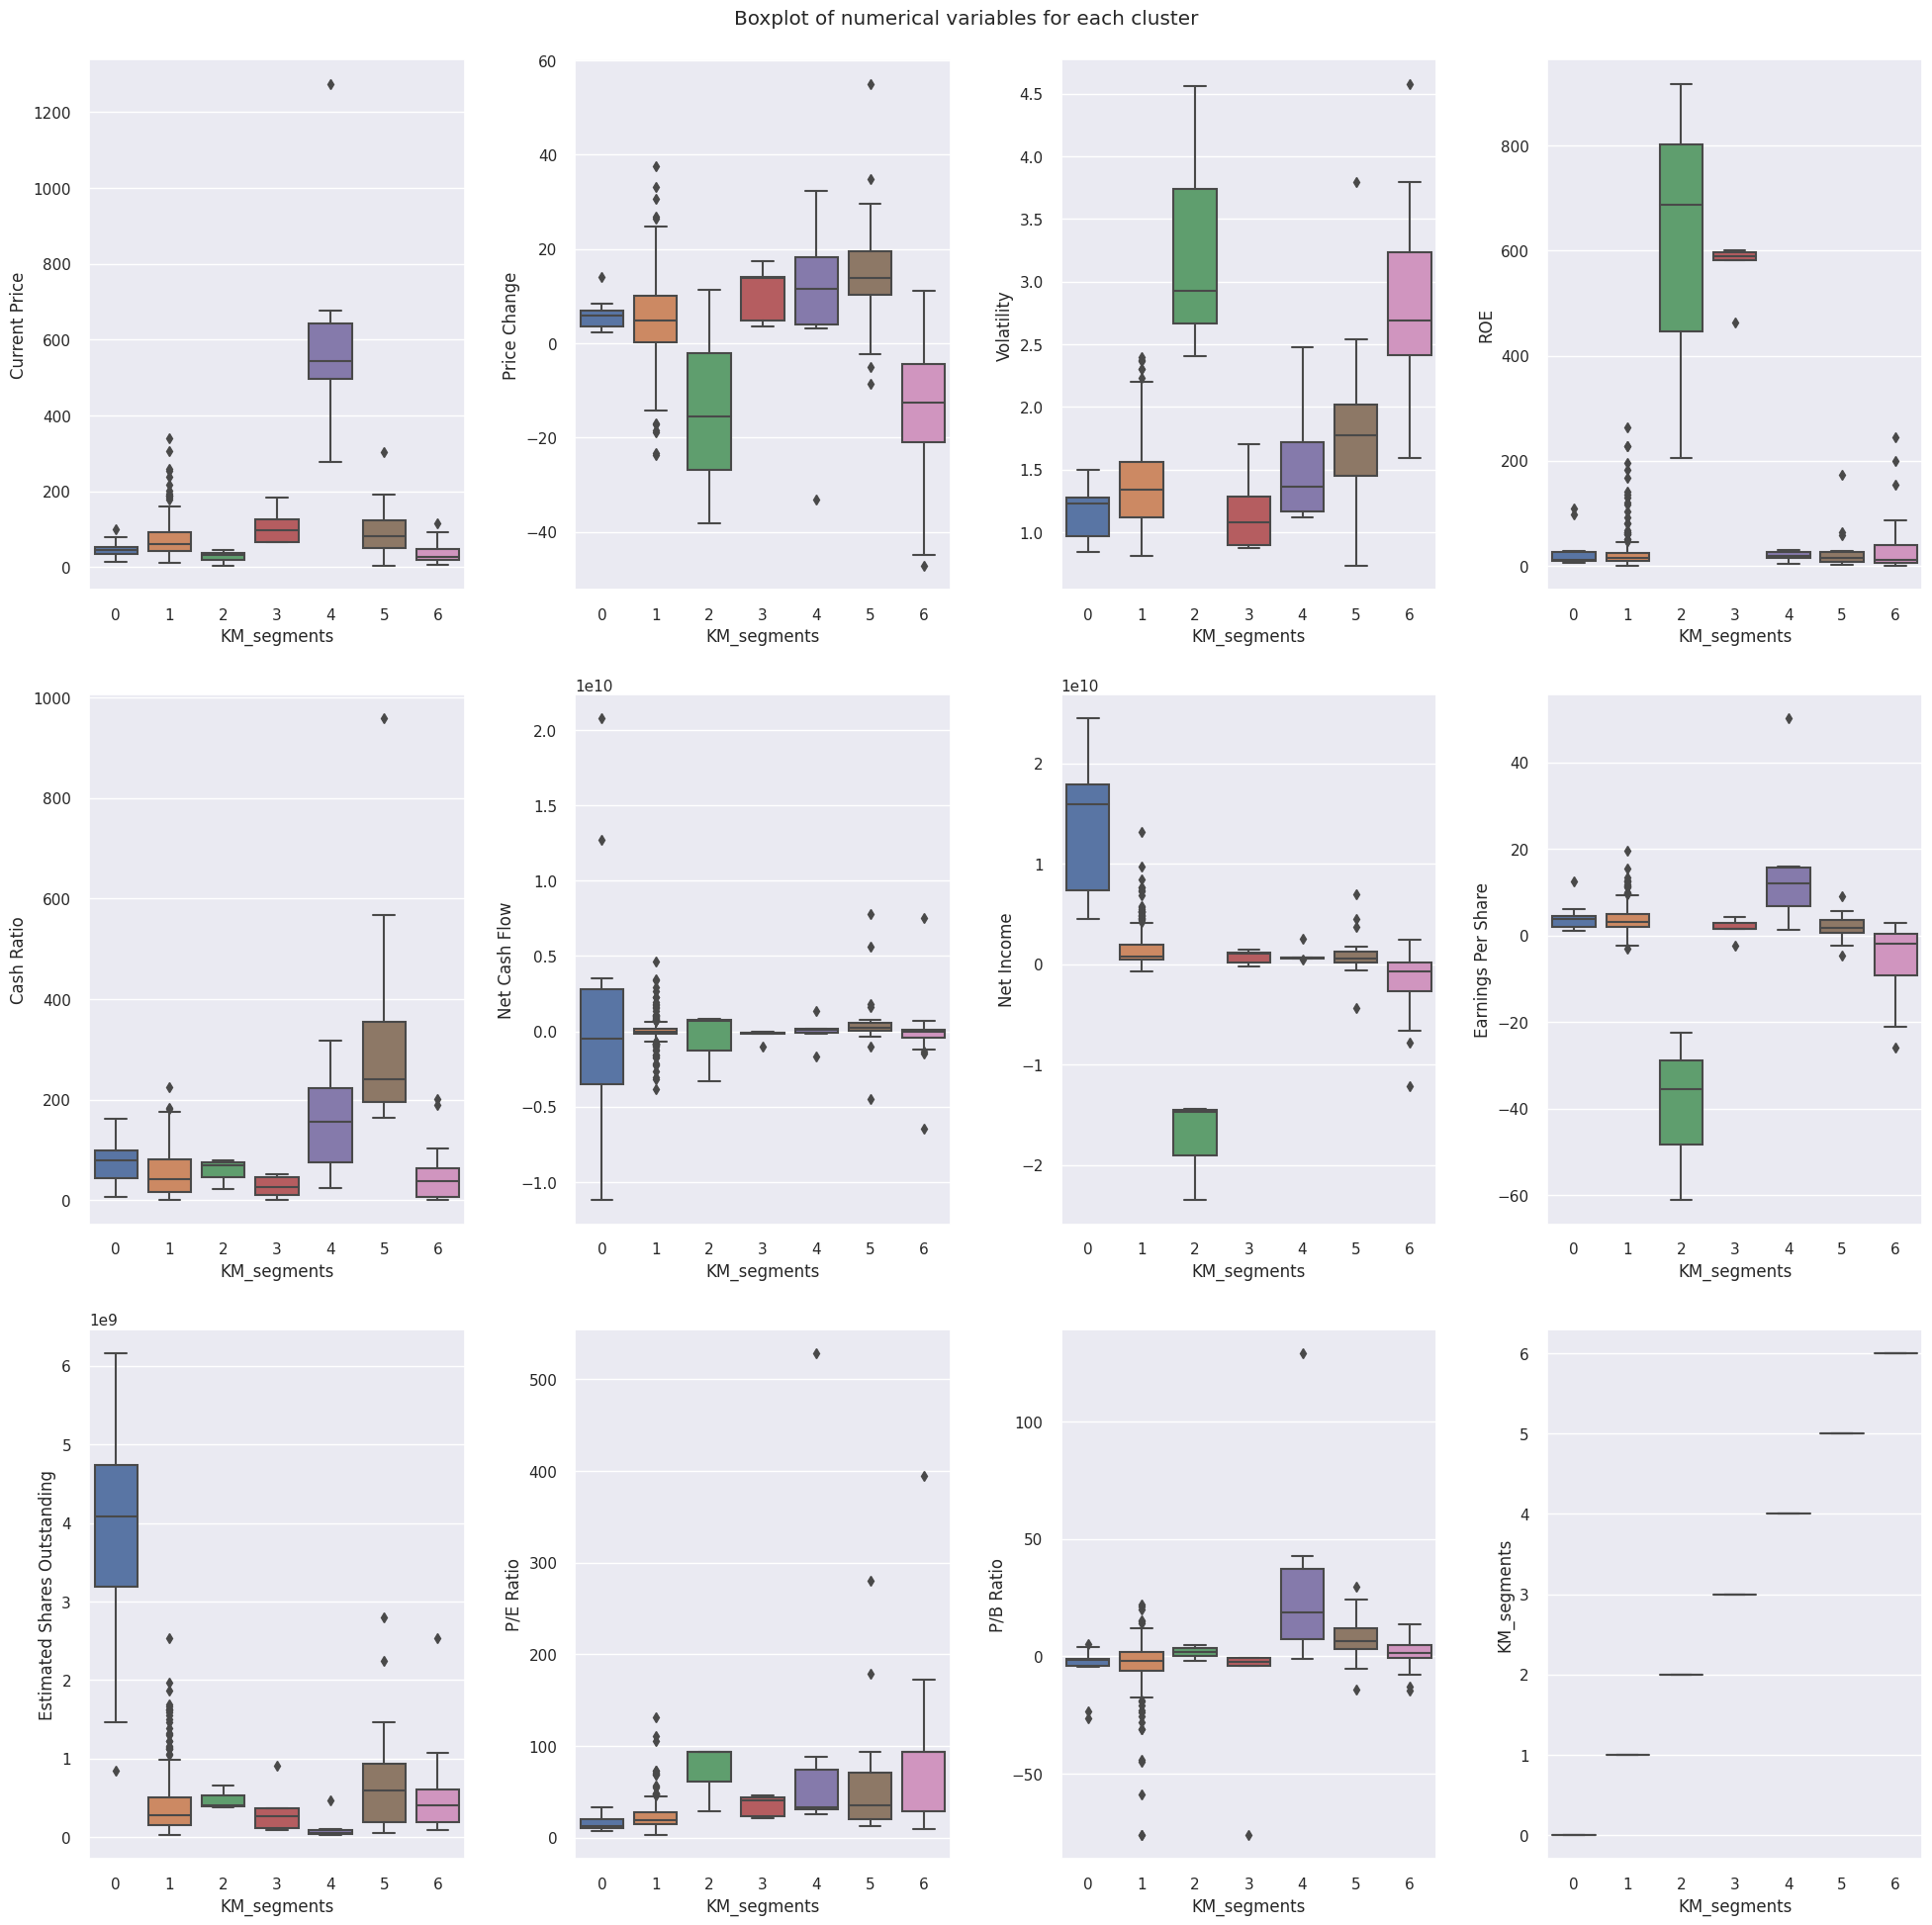

In [125]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df1.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

#### Insights
* Group 0 comprises 13 securities, and is a fairly steady set of stocks. Low volatility, minor positive recent price change and average EPS. The only outlier for this group is it has a massive amount of estimated shares outstanding.
* Group 1 is our largest cluster with 264 securities. It has on average a lower volatility. Recent price changes for the group are mostly positive, but lower whisker is negative. That said, it still has the second highest EPS and with the high number of securities, it is a very conservative and diversified group to invest in.
* Group 2 is our biggest red flag and only consists of 3 securities. These have all seen major price decreases lately and are very volatile. While some could argue they are set for a large bounce back, it could also be known as a 'falling knife'. Investors should be extremely cautious with this cluster.
* Group 3 has 5 securities, and we are back to a more average set of financials. This major standout here is a considerably high ROE. These companies are able to provide a much higher value of return compared to investor's equity. With low volatility, this group seems like a steady and safe bet for investments.
* Group 4 has 6 securities, and the lowest estimated shares outstanding. They have rock solid ratios, low volatility, and a high EPS. The only downside is these stocks are by far the most expensive, with only a few other clusters having a couple outliers near its bottom IQR. These are known as 'blue chip' stocks, and highly recommended to invest in.
* Group 5 consists of 22 securities. A very diverse cluster in terms of industry. Volatility is slightly higher here, however, and EPS dips into the negative in the lower IQR. Depending on the level of risk exposure of the investor, I couldn't recommend this group on a broad scale.
* Group 6 consists of 27 securities. This group only consists of 3 industries, most from the energy sector. We've seen earlier that this is the poorest performer and it shows. While not as bad as group 2, I cannot recommend investing here.

## Hierarchical Clustering

In [126]:
# Let's create a new dataframe to start our new clustering.
hc_df = subset_scaled_df.copy()

In [127]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [128]:
# Create a print function to give us the highest correlation, distance, and linkage type
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    ))

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


#### Euclidean linkages

In [129]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [130]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


* Euclidean distance offered the highest cophenetic scores with the average linkage.

#### Dendrograms

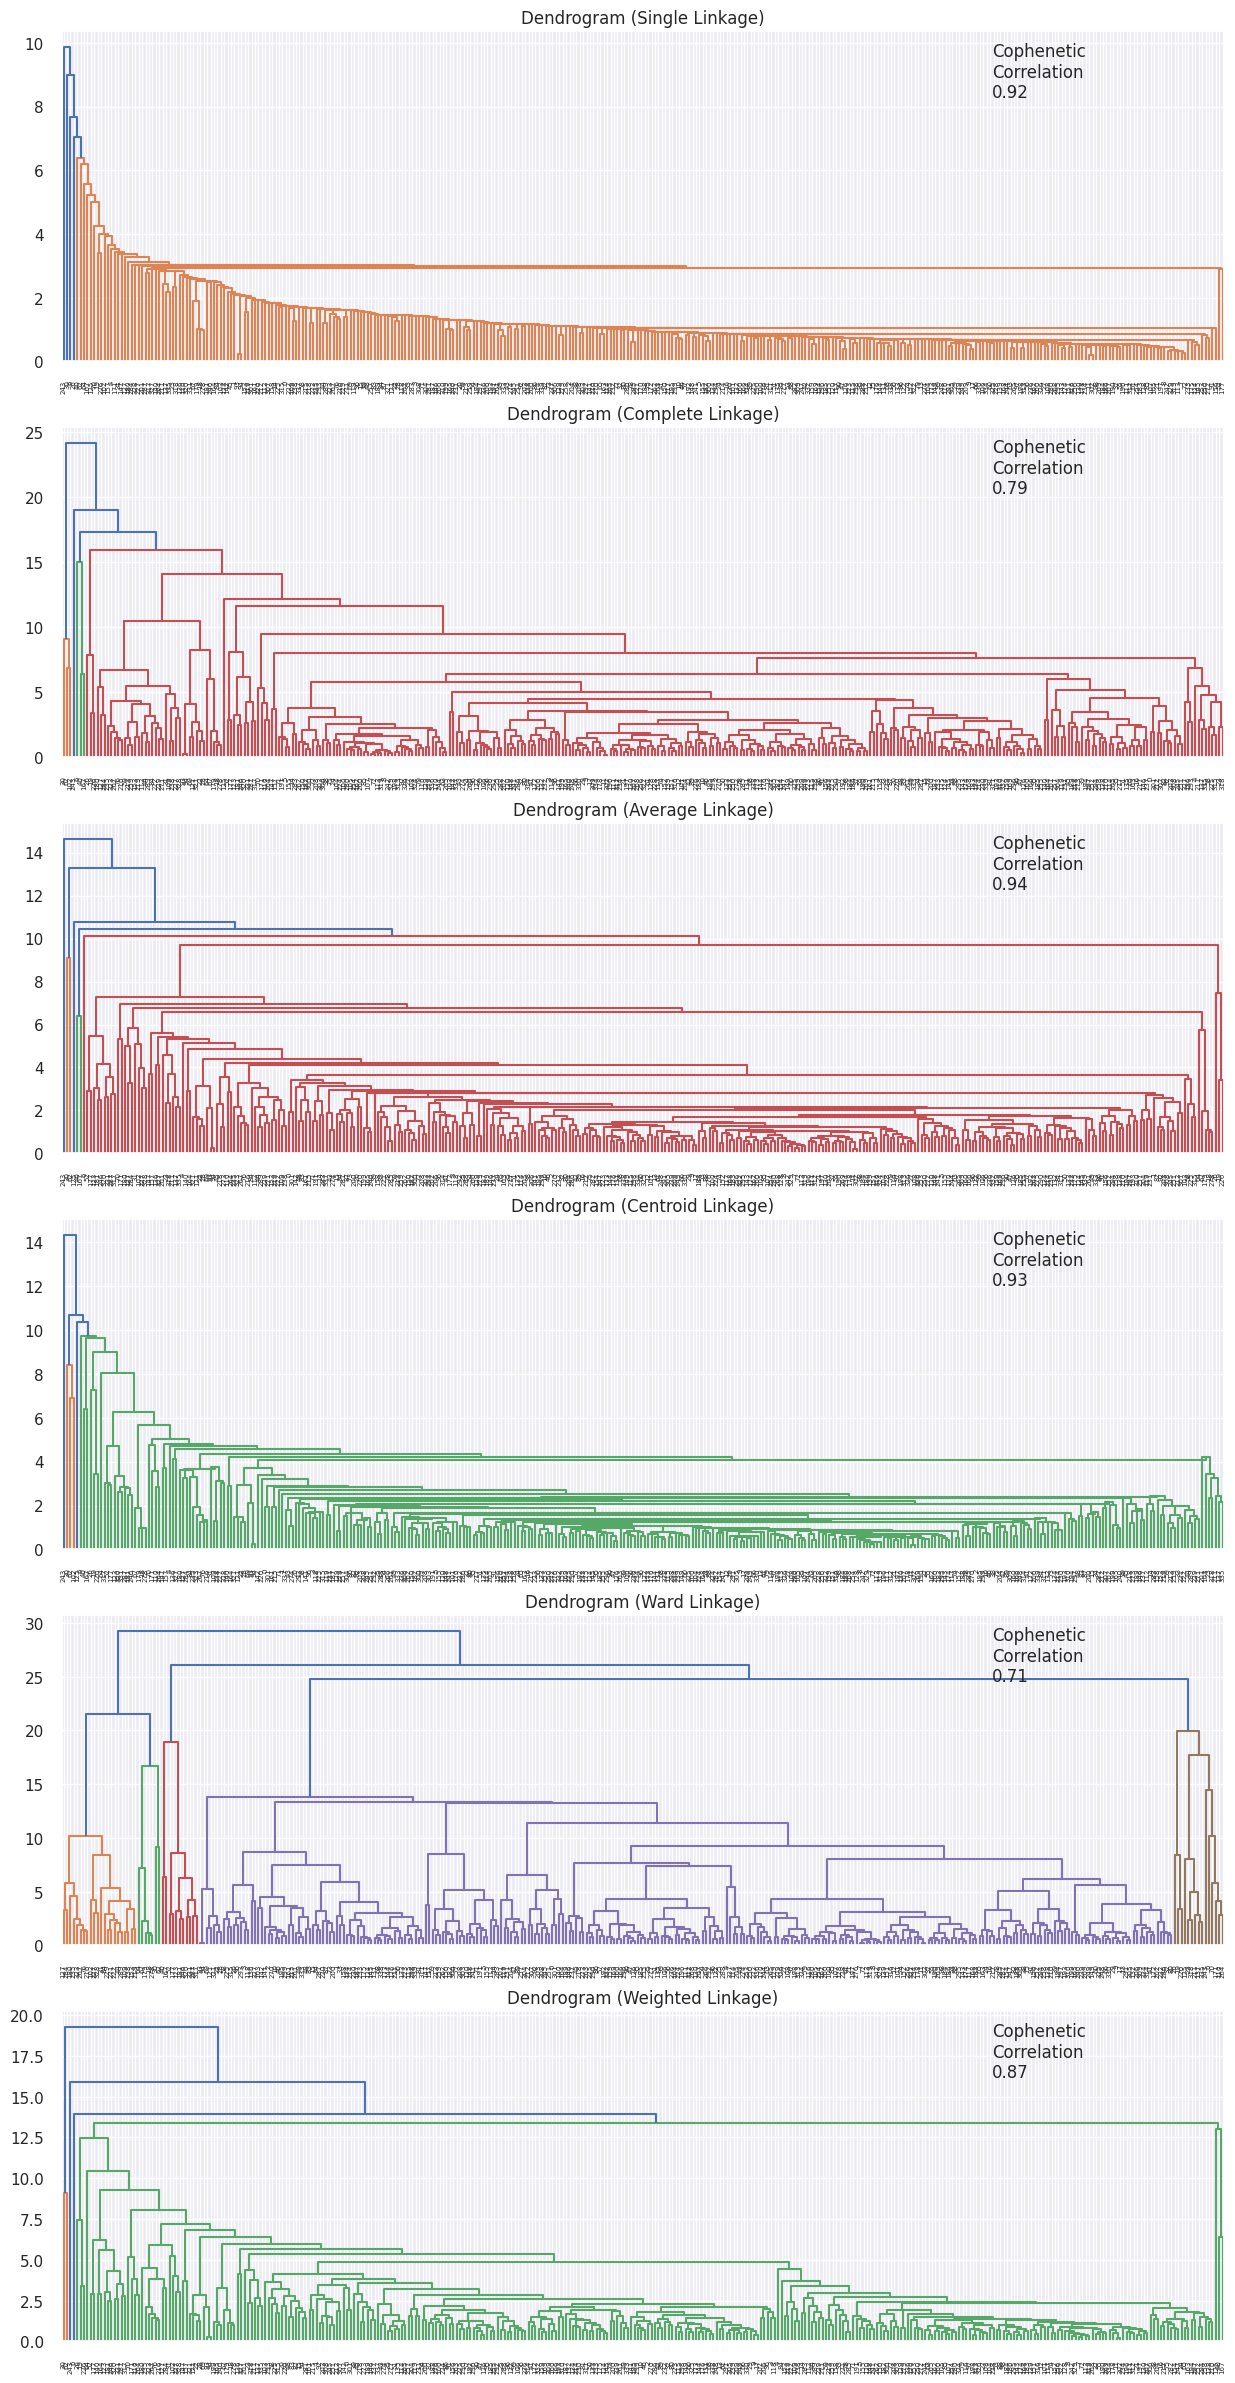

In [131]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [132]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient", ascending=False)
df_cc

,Linkage,Cophenetic Coefficient
2,average,0.942254
3,centroid,0.931401
0,single,0.923227
5,weighted,0.869378
1,complete,0.787328
4,ward,0.710118


In [133]:
HCmodel = AgglomerativeClustering(n_clusters=8, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=8)

In [134]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [135]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [136]:
hc_cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [137]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,4.500000,-38.101788,4.559815,687.000000,22.000000,-3283000000.000000,-14685000000.000000,-22.430000,654703522.100000,28.407929,-1.840528,1
7,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1


In [138]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2 [df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

In [139]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
1            Financials                      1
             Information Technology          1
2            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    39
             Industrials                    53
             Information Technology         29
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
6            Energy                          1
7            Energy

* Compared to our K-means clustering, the hierarchical clustering did a poor job at grouping everything together.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
* K-means was much faster in this scenario.

- Which clustering technique gave you more distinct clusters, or are they the same?
* K-means was far superior at giving distinct clusters. Perhaps if outliers were treated our results may have been different, but by leaving them  in there is no comparison between the two as far as performace.

- How many observations are there in the similar clusters of both algorithms?
* Both algorithims chose one cluster that was significantly larger than the others.

- How many clusters are obtained as the appropriate number of clusters from both algorithms?
* Between 6-8 clusters seemed appropriate given the treatment of the data for both algos.


## Actionable Insights and Recommendations

* K-means gave us a great set of clusters to use for different types of investors.
* Cluster 4 is our strongest set of securities, or 'blue chips'. Investment into these stocks are highly recommended for steady growth.
* Clusters 0, 1 and 3 are recommended for slower, more conservative investors. Cluster 1 especially as it is the most diverse of all and would have the lowest amount of risk.
* Clusters 2 and 6 should be avoided as investments. These clusters represent securities that have recently performed poorly and have higher volatility.
* Cluster 5 is the last to be considered for investment, but only for experienced investors who don't mind a biut more exposure to risk. While a diverse group, it shows a greater risk/reward ratio compared to the rest of the group.
* Any further insight from specific clusters can be found in the insights section of the K-means clustering.